<a href="https://colab.research.google.com/github/yaajnu/FastAi/blob/main/Lesson_2_practive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.5 MB/s 
     |████████████████████████████████| 189 kB 43.0 MB/s 
     |████████████████████████████████| 1.2 MB 31.3 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 51 kB 303 kB/s 


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
import os
key=os.environ.get('AZURE SEARCH KEY','47427ca2dd3444c69fb0d0d2fdccf44a')

In [4]:
animal_types='leopard','cheetah','tiger'
path=Path('cats')

In [5]:
animal_types


('leopard', 'cheetah', 'tiger')

In [6]:
if not path.exists():
  path.mkdir()
  for a in animal_types:
    dest=(path/a)
    dest.mkdir(exist_ok=True)
    results=search_images_bing(key,f'{a}')
    download_images(dest,urls=results.attrgot('contentUrl'))

In [7]:
fns=get_image_files(path)
fns

(#427) [Path('cats/cheetah/00000038.jpg'),Path('cats/cheetah/00000008.jpg'),Path('cats/cheetah/00000109.jpg'),Path('cats/cheetah/00000002.jpg'),Path('cats/cheetah/00000019.jpg'),Path('cats/cheetah/00000128.jpg'),Path('cats/cheetah/00000127.jpg'),Path('cats/cheetah/00000045.jpg'),Path('cats/cheetah/00000133.jpg'),Path('cats/cheetah/00000114.jpg')...]

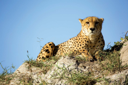

In [8]:
im=Image.open(fns[0])
im.to_thumb(128,128)

In [9]:
failed=verify_images(fns)
failed

(#1) [Path('cats/tiger/00000093.jpg')]

In [10]:
failed.map(Path.unlink)

(#1) [None]

In [11]:
cats=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=1),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
  batch_tfms=aug_transforms()
)
dl=cats.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


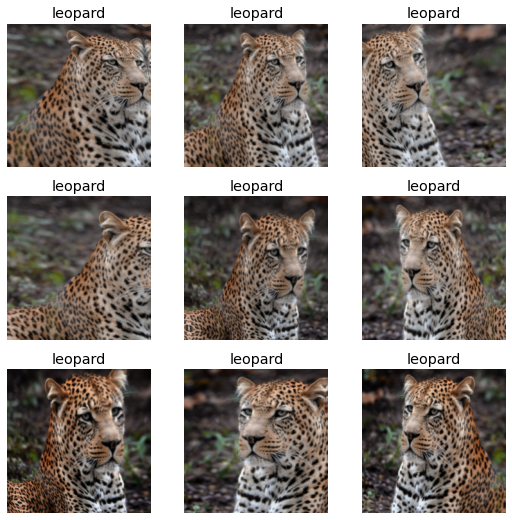

In [12]:
dl.show_batch(unique=True)

In [14]:
learn=cnn_learner(dl,resnet34,metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.830502,0.230251,0.082353,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.484110,0.181429,0.070588,00:32
1,0.287865,0.221626,0.058824,00:32
2,0.213839,0.198900,0.035294,00:31
3,0.174049,0.183189,0.047059,00:32


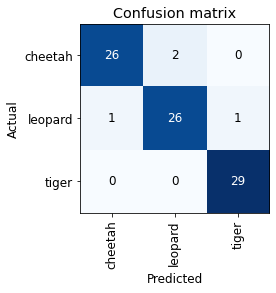

In [16]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

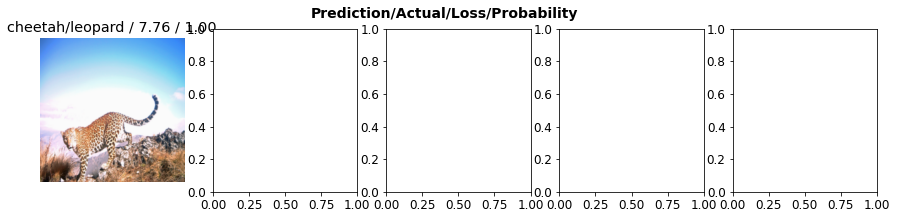

In [19]:
interp.plot_top_losses(5,nrows=1)

In [20]:
learn.export()

In [21]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [24]:
learn_inf.predict('cats/tiger/00000094.jpg')

('tiger', tensor(2), tensor([3.0082e-06, 2.5388e-07, 1.0000e+00]))

In [25]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [26]:
out_pl = widgets.Output()
out_pl.clear_output()

In [29]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [32]:
lbl_pred = widgets.Label()


In [30]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [33]:
VBox([widgets.Label('Select your cat!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [34]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.6 MB 5.4 MB/s 
     |████████████████████████████████| 553 kB 45.7 MB/s 
     |████████████████████████████████| 394 kB 32.4 MB/s 
     |████████████████████████████████| 112 kB 30.1 MB/s 
     |████████████████████████████████| 428 kB 41.5 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 78 kB 5.6 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
